In [3]:
import os
import numpy as np
import pickle
import pandas as pd
import tensorflow as tf

In [120]:
# total label = 45

num_frame = 20
directory = "txt_"

X = []
y = []
file_list = os.listdir(directory)
for file in file_list:
    df = pd.read_csv(os.path.join(directory,file),index_col=0)
    dataset = df.iloc[:]
    label = int(file.split("_")[0])
    n_sample = len(dataset)
    for i in range(num_frame,n_sample):
        temp = dataset[i-num_frame:i]
        temp = np.array(temp)
        rec = [
            temp[:,range(0,195,3)], # x_axis
            temp[:,range(1,195,3)], # y_axis
            temp[:,range(2,195,3)], # z_axis
        ]
        X.append(rec)
        y.append(label)

X = np.array(X)
y = np.array(y)

from sklearn.utils import shuffle
X, y = shuffle(X,y)

# np.save("X_landmarks_train.npy",X)
# np.save("y_landmarks_train.npy",y)

In [121]:
num_frame = 20
directory = "pre_split_test_files/txt_"

X_test = []
y_test = []
file_list = os.listdir(directory)
for file in file_list:
    df = pd.read_csv(os.path.join(directory,file),index_col=0)
    dataset = df.iloc[:]
    label = int(file.split("_")[0])
    n_sample = len(dataset)
    for i in range(num_frame,n_sample):
        temp = dataset[i-num_frame:i]
        temp = np.array(temp)
        rec = [
            temp[:,range(0,195,3)], # x_axis
            temp[:,range(1,195,3)], # y_axis
            temp[:,range(2,195,3)], # z_axis
        ]
        X_test.append(rec)
        y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [103]:
def normalize_along_axis(X):
    X = (X - np.mean(X)/np.std(X))
    return X

In [104]:
print(X.shape)
X,X_test = normalize_along_axis(X), normalize_along_axis(X_test)

(28445, 3, 20, 65)


In [105]:
# print(X[0][0])
X = X.reshape(X.shape[0],3,20,65)
print(X[0][0][0])

[-0.01224521  0.00399423  0.01687843  0.02895987 -0.03401005 -0.04615214
 -0.05651691  0.04412139 -0.06488189  0.016895   -0.02907795  0.15085143
 -0.12829554  0.20558453 -0.19919011  0.21265596 -0.06406665  0.22737253
 -0.03366414  0.20106572 -0.03377646  0.19029665 -0.03953946  0.2097742
  0.18074358  0.16637343  0.15879023  0.15517664  0.19900602  0.18588525
  0.17437673  0.16773707  0.21571469  0.20178563  0.18993074  0.18241519
  0.22614795  0.213799    0.20206249  0.19513786  0.23165029  0.22260428
  0.21290302  0.20639449 -0.078996   -0.08370861 -0.07311636 -0.05236921
 -0.03242907 -0.07189616 -0.037355   -0.02162266 -0.015385   -0.05356479
 -0.0199573  -0.00843215 -0.00649685 -0.03607523 -0.00943771 -0.0027926
 -0.00398737 -0.02199396 -0.00809178 -0.00664186 -0.00855222]


In [34]:
# create LSTM model
num_frame = 20
num_key = 195
out_classes = 87

# build model
from keras.models import Sequential
from keras.layers import LSTM, BatchNormalization, Dropout, Flatten, Dense
from keras.optimizers import Adamax
from keras.regularizers import L2

model = Sequential([
    LSTM(units=num_key,
         return_sequences=True,
         kernel_regularizer=L2(),
         input_shape=(num_frame,num_key)),
    BatchNormalization(),
    Dropout(.3),

    
    LSTM(units=num_key*2,
         return_sequences=True,
         kernel_regularizer=L2()),
    BatchNormalization(),
    Dropout(.3),

    
    LSTM(units=out_classes,
         return_sequences=True,
         kernel_regularizer=L2()),
    BatchNormalization(),
    Dropout(.3),

    Flatten(),
#     Dense(1000,activation="relu"),
    Dense(out_classes,activation="softmax")
])

model.build()
model.summary()

# model.load_weights(filepath="LSTM_126_63_63.keras")

d:\Anaconda\envs\test_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 20, 195)        │       304,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 20, 195)        │           780 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 20, 195)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 20, 390)        │       914,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 20, 390)        │         1,560 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 20, 390)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 20, 87)         │       166,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 20, 87)         │           348 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 20, 87)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1740)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 87)             │       151,467 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,539,639 (5.87 MB)

 Trainable params: 1,538,295 (5.87 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [35]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping
def scheduler(epoch,lr):
    return 0.001*0.8**(epoch//5)
lr_scheduler = LearningRateScheduler(scheduler)
checkpoint = ModelCheckpoint(
    filepath="LSTM_195_390_87_D87.keras",
    save_best_only=True
)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, start_from_epoch=20)
model.compile(loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
              optimizer=Adamax(0.001))

In [36]:
batch_size = 256
epochs = 40

history = model.fit(X,y,
                    validation_data=(X_test,y_test),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[lr_scheduler,checkpoint,early_stopping_callback])

Epoch 1/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 28s 202ms/step - accuracy: 0.2235 - loss: 11.8141 - val_accuracy: 0.0311 - val_loss: 9.4099 - learning_rate: 0.0010
Epoch 2/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 194ms/step - accuracy: 0.6431 - loss: 6.0033 - val_accuracy: 0.1087 - val_loss: 7.0781 - learning_rate: 0.0010
Epoch 3/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 186ms/step - accuracy: 0.8275 - loss: 3.8811 - val_accuracy: 0.1319 - val_loss: 6.1279 - learning_rate: 0.0010
Epoch 4/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - accuracy: 0.8940 - loss: 2.8387 - val_accuracy: 0.1290 - val_loss: 6.3402 - learning_rate: 0.0010
Epoch 5/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 192ms/step - accuracy: 0.9187 - loss: 2.2452 - val_accuracy: 0.1174 - val_loss: 6.8306 - learning_rate: 0.0010
Epoch 6/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - accuracy: 0.9469 - loss: 1.8311 - val_accuracy: 0.1158 - val_loss: 6.8803 - learning_rate: 8.0000e-04
Epoch 7/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy

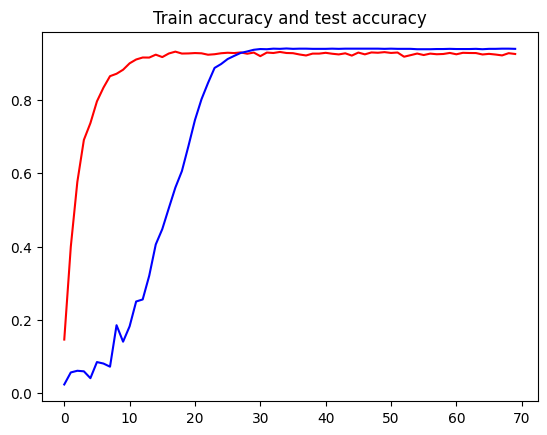

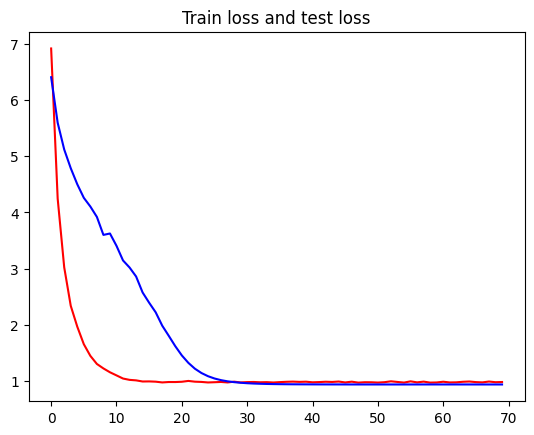

In [20]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
plt.plot(acc,"r")
plt.plot(val_acc,"b")
plt.title("Train accuracy and test accuracy")
plt.show()

plt.plot(loss,"r")
plt.plot(val_loss,"b")
plt.title("Train loss and test loss")
plt.show()

In [28]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average="macro")
prec = precision_score(y_test,pred,average="macro")
rec = recall_score(y_test,pred,average="macro")
print("Accuracy: {}, F1_score: {}".format(round(acc,4),round(f1,4)))
print("Precision: {}, Recall: {}".format(round(prec,4),round(rec,4)))

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


TypeError: type numpy.ndarray doesn't define __round__ method

In [62]:
# create 1D-CNN model
num_frame = 20
num_key = 195
out_classes = 87

# build model
from keras.models import Sequential
from keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense, MaxPool1D, Permute, Reshape
from keras.optimizers import AdamW
from keras.regularizers import L2

model = Sequential([
     Permute((2,1)),
#      Reshape((num_key//3,num_frame*3)),
     Conv1D(filters=60,
            kernel_size=3,
            strides=1,
            padding="same",
            data_format="channels_last",
            activation="relu",
            kernel_regularizer=L2()),
     BatchNormalization(),
#      MaxPool1D(pool_size=3,
#                strides=3,
#                padding="same"),
     
     Conv1D(filters=120,
            kernel_size=3,
            strides=1,
            padding="same",
            data_format="channels_last",
            activation="relu",
            kernel_regularizer=L2()),
     BatchNormalization(),
#      MaxPool1D(pool_size=5,
#                strides=5,
#                padding="same"),

     Conv1D(filters=240,
            kernel_size=3,
            strides=1,
            padding="same",
            data_format="channels_last",
            activation="relu",
            kernel_regularizer=L2()),
     BatchNormalization(),
#      MaxPool1D(pool_size=3,
#                strides=1,
#                padding="same"),
     Flatten(),
     Dropout(.3),
     Dense(out_classes,activation="softmax"),
])

model.build(input_shape = (None,num_frame,num_key))
model.summary()

# model.load_weights(filepath="LSTM_126_63_63.keras")

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ permute_11 (Permute)            │ (None, 195, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_33 (Conv1D)              │ (None, 195, 60)        │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 195, 60)        │           240 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_34 (Conv1D)              │ (None, 195, 120)       │        21,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 195, 120)       │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_35 (Conv1D)              │ (None, 195, 240)       │        86,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 195, 240)       │           960 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 46800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 46800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 87)             │     4,071,687 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,185,387 (15.97 MB)

 Trainable params: 4,184,547 (15.96 MB)

 Non-trainable params: 840 (3.28 KB)

In [132]:
# create 2D-CNN model
# input shape (None, 3, 20, 65)

num_frame = 20
num_key = 65
num_channel = 3 # (x,y,z)
out_classes = 87

# build model
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D, Permute, Reshape
from keras.optimizers import AdamW
from keras.regularizers import L2

model = Sequential([
    Conv2D(filters=20,
           kernel_size=3,
           strides=1,
           padding="same",
           kernel_regularizer=L2(),
           data_format="channels_first"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2),
              strides=(2,2),
              data_format="channels_first"),
    Dropout(.2),
    
    Conv2D(filters=40,
           kernel_size=3,
           strides=1,
           padding="same",
           kernel_regularizer=L2(),
           data_format="channels_first"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2),
              strides=(2,2),
              data_format="channels_first"),
    Dropout(.2),

    Conv2D(filters=80,
           kernel_size=3,
           strides=1,
           padding="same",
           kernel_regularizer=L2(),
           data_format="channels_first"),
    BatchNormalization(),
    Dropout(.2),

    Flatten(),
    Dense(out_classes,activation="softmax")
])
model.build(input_shape = (None,num_channel,num_frame,num_key))
model.summary()

# model.load_weights(filepath="LSTM_126_63_63.keras")

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 20, 20, 65)     │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_75          │ (None, 20, 20, 65)     │           260 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 20, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 20, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 40, 10, 32)     │         7,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_76          │ (None, 40, 10, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 40, 5, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 40, 5, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 80, 5, 16)      │        28,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_77          │ (None, 80, 5, 16)      │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 80, 5, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 87)             │       556,887 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 594,019 (2.27 MB)

 Trainable params: 593,793 (2.27 MB)

 Non-trainable params: 226 (904.00 B)

In [14]:
# test depthwise 1dcnn

num_frame = 20
num_key = 126
out_classes = 45

# build model
from keras.models import Sequential
from keras.layers import DepthwiseConv1D, BatchNormalization, Dropout, Flatten, Dense
from keras.optimizers import AdamW
from keras.regularizers import L2

model = Sequential([
     DepthwiseConv1D(depth_multiplier=3,
            kernel_size=3,
            strides=1,
            padding="same",
            data_format="channels_first",
            activation="relu",
            depthwise_regularizer=L2()),
     BatchNormalization(),
     
     DepthwiseConv1D(depth_multiplier=2,
            kernel_size=3,
            strides=1,
            padding="same",
            data_format="channels_first",
            activation="relu",
            depthwise_regularizer=L2()),
     BatchNormalization(),

     DepthwiseConv1D(depth_multiplier=2,
            kernel_size=3,
            strides=1,
            padding="same",
            data_format="channels_first",
            activation="relu",
            depthwise_regularizer=L2()),
     BatchNormalization(),

     Flatten(),
     Dropout(.5),
     Dense(out_classes,activation="softmax"),
])

model.build(input_shape = (None,20,126))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ depthwise_conv1d_4              │ (None, 60, 126)        │           240 │
│ (DepthwiseConv1D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 60, 126)        │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv1d_5              │ (None, 120, 126)       │           480 │
│ (DepthwiseConv1D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 120, 126)       │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv1d_6              │ (None, 240, 126)       │           960 │
│ (DepthwiseConv1D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 240, 126)       │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 30240)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30240)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 45)             │     1,360,845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,364,037 (5.20 MB)

 Trainable params: 1,363,281 (5.20 MB)

 Non-trainable params: 756 (2.95 KB)

In [137]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping
def scheduler(epoch,lr):
    return 0.0004*0.8**(epoch//10)
lr_scheduler = LearningRateScheduler(scheduler)
checkpoint = ModelCheckpoint(
    filepath="2DCNN_20_40_80.keras",
    save_best_only=True
)
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=20, start_from_epoch=20)

model.compile(loss="categorical_hinge",
              metrics=["accuracy"],
              optimizer=AdamW(0.001))

In [122]:
from keras.utils import to_categorical
y, y_test = to_categorical(y,87), to_categorical(y_test,87)

In [138]:
epochs = 200
batch_size = 256

history = model.fit(X,y,
                    validation_data = (X_test,y_test),
                    epochs = epochs,
                    batch_size = batch_size,
                    callbacks = [lr_scheduler,checkpoint,early_stopping_callback])

Epoch 1/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.8056 - loss: 0.3841 - val_accuracy: 0.2935 - val_loss: 1.3356 - learning_rate: 4.0000e-04
Epoch 2/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.8057 - loss: 0.3800 - val_accuracy: 0.3045 - val_loss: 1.3014 - learning_rate: 4.0000e-04
Epoch 3/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.8116 - loss: 0.3653 - val_accuracy: 0.2875 - val_loss: 1.3431 - learning_rate: 4.0000e-04
Epoch 4/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.8127 - loss: 0.3651 - val_accuracy: 0.2917 - val_loss: 1.3260 - learning_rate: 4.0000e-04
Epoch 5/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.8203 - loss: 0.3480 - val_accuracy: 0.2964 - val_loss: 1.3227 - learning_rate: 4.0000e-04
Epoch 6/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.8207 - loss: 0.3463 - val_accuracy: 0.3016 - val_loss: 1.3143 - learning_rate: 4.0000e-04
Epoch 7/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 8

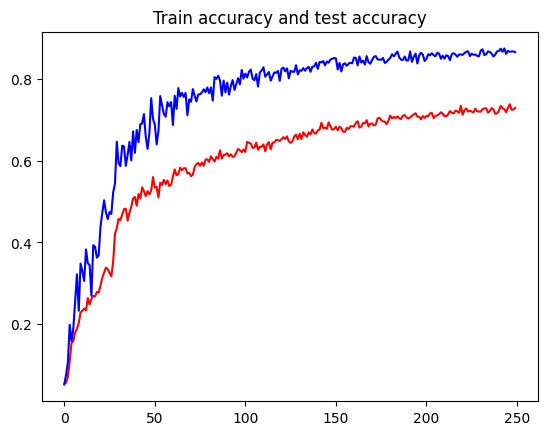

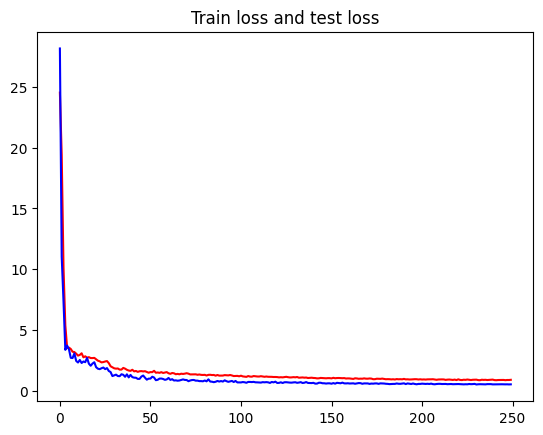

In [21]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
plt.plot(acc,"r")
plt.plot(val_acc,"b")
plt.title("Train accuracy and test accuracy")
plt.show()

plt.plot(loss,"r")
plt.plot(val_loss,"b")
plt.title("Train loss and test loss")
plt.show()

In [139]:
# model.load_weights("1DCNN_60_120_240.keras")
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average="macro")
prec = precision_score(y_test,pred,average="macro")
rec = recall_score(y_test,pred,average="macro")
print("Accuracy: {}, F1_score: {}".format(round(acc,4),round(f1,4)))
print("Precision: {}, Recall: {}".format(round(prec,4),round(rec,4)))

291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [140]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_data = confusion_matrix(y_test,pred)
# Create the confusion matrix heatmap
sns.heatmap(cm_data, annot=False, fmt='g', cmap='cividis')  # You can customize the colormap here

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets